# ======================================================================
# Hydrological Parameter Sensitivity in SWAT using the Morris Method
# + Machine Learning Surrogate Model using Random Forest
# ======================================================================

**Author:** Hamidreza Naserian  
**Model:** ArcSWAT 2012  
**Workflow:** Global Sensitivity Analysis + Data-Driven Surrogate Learning  
**Methods:** Morris (Elementary Effects), Random Forest Regression, Uncertainty Estimation  

---

## 📘 Overview

This notebook provides a complete, reproducible workflow for:

1. **Global sensitivity analysis** of 12 key SWAT hydrological parameters  
   using the **Morris Method (Elementary Effects)**.
2. Construction of a **Machine Learning Surrogate Model**  
   that predicts:
   - **NSE (Nash–Sutcliffe Efficiency)**  
   - **Range of simulated streamflow (Max–Min)**  
   based on the sampled SWAT parameters.
3. Extraction of **feature importance** and **prediction uncertainty**  
   using an ensemble of Random Forest models.

This workflow integrates:
✔ Parameter perturbation  
✔ Automatic modification of SWAT input files  
✔ Model execution via `swat2012.exe`  
✔ Extraction of streamflow from `output.rch`  
✔ Hydrological performance evaluation  
✔ Machine learning surrogate modeling  

---

## 🎯 Purpose of This Notebook

This notebook transforms a traditional SWAT sensitivity analysis into a  
**hybrid physics–data workflow**, making it suitable for:

- Research papers  
- MSc/PhD thesis projects  
- Calibration & uncertainty studies  
- High-performance model reduction  
- Surrogate-based optimization  

---

## 📂 Required Input Files

Place the following in the `data/` directory:

- `Observed Streamflow.xlsx` — observed discharge
- `TxtInOut/` — SWAT project directory (user-provided)
- `swat2012.exe` — SWAT executable (cannot be distributed)
- `output.rch` — generated after each SWAT run

---

## ⚠️ Important Note on NSE Values

NSE values may become **negative** for uncalibrated parameter sets.  
This is expected and indicates that the current random parameter combination  
performs worse than using the mean of observed data.  
It is **not a model error** and does **not affect** sensitivity or ML training.

---

## 🧩 Notebook Sections

1. Define the parameter space  
2. Generate Morris samples (SALib)  
3. Update SWAT inputs + run model  
4. Extract simulated streamflow  
5. Compute Range & NSE  
6. Perform Morris analysis  
7. Plot sensitivity results  
8. Build ML surrogate (Random Forest)  
9. Evaluate performance (R², RMSE)  
10. Feature importance + uncertainty analysis  

---

### ✔ Notebook developed by **Hamidreza Naserian**



Running SWAT for sample 1/208
                SWAT2022               
               Rev. 687               
      Soil & Water Assessment Tool    
               PC Version             
 Program reading from file.cio . . . executing

  Executing year    1
  Executing year    2

 Execution successfully completed 

Updated Parameters: CN2=80.00, SURLAG=0.05, SFTMP=-0.71, SMTMP=-5.00, SMFMX=4.86, SMFMN=1.00, GW_DELAY=44.29, ALPHA_BF=0.22, GWQMN=642.86, RCHRG_DP=0.20, SOL_K=128.58, SOL_AWC=0.22
Extracted Streamflow Values: [0.1812, 0.7634, 1.09, 0.1989, 3.197, 1.96, 0.7881, 0.316, 0.1916, 0.8399, 27.76, 1.654, 2.519, 0.1786, 2.369, 2.905, 1.536, 2.342, 0.3072, 0.3622, 11.57, 0.5563, 3.777, 2.372]

Running SWAT for sample 2/208
                SWAT2022               
               Rev. 687               
      Soil & Water Assessment Tool    
               PC Version             
 Program reading from file.cio . . . executing

  Executing year    1
  Executing year    2

 Execution succ

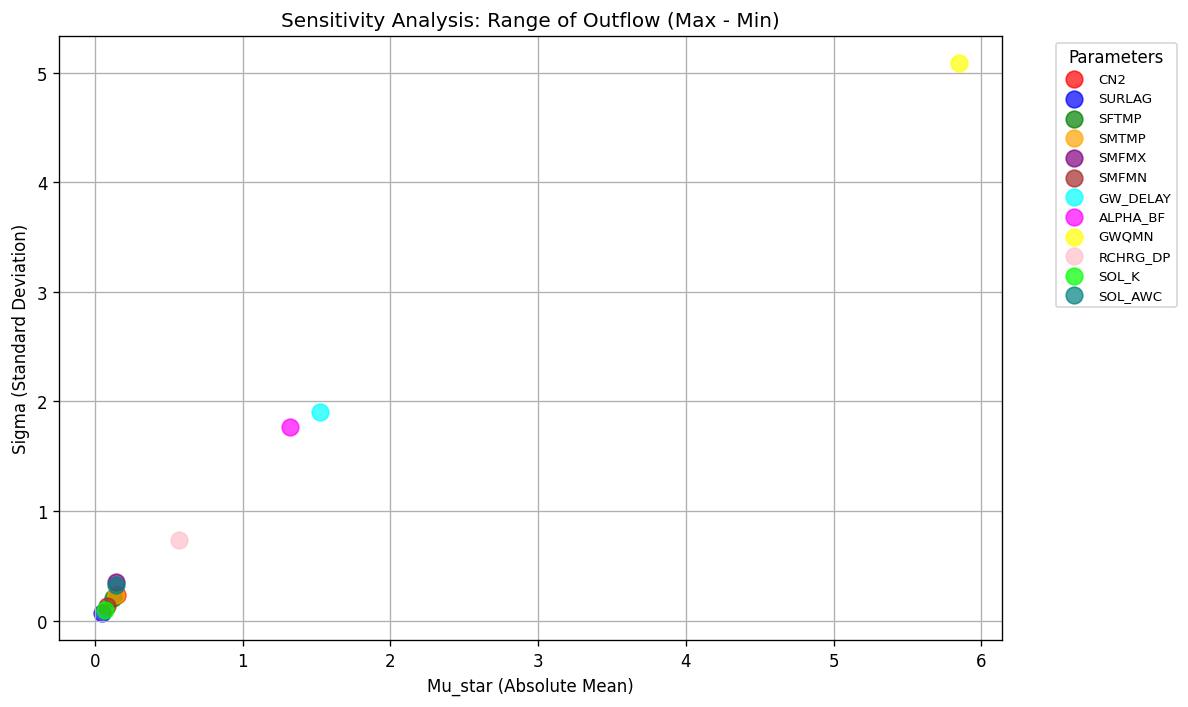

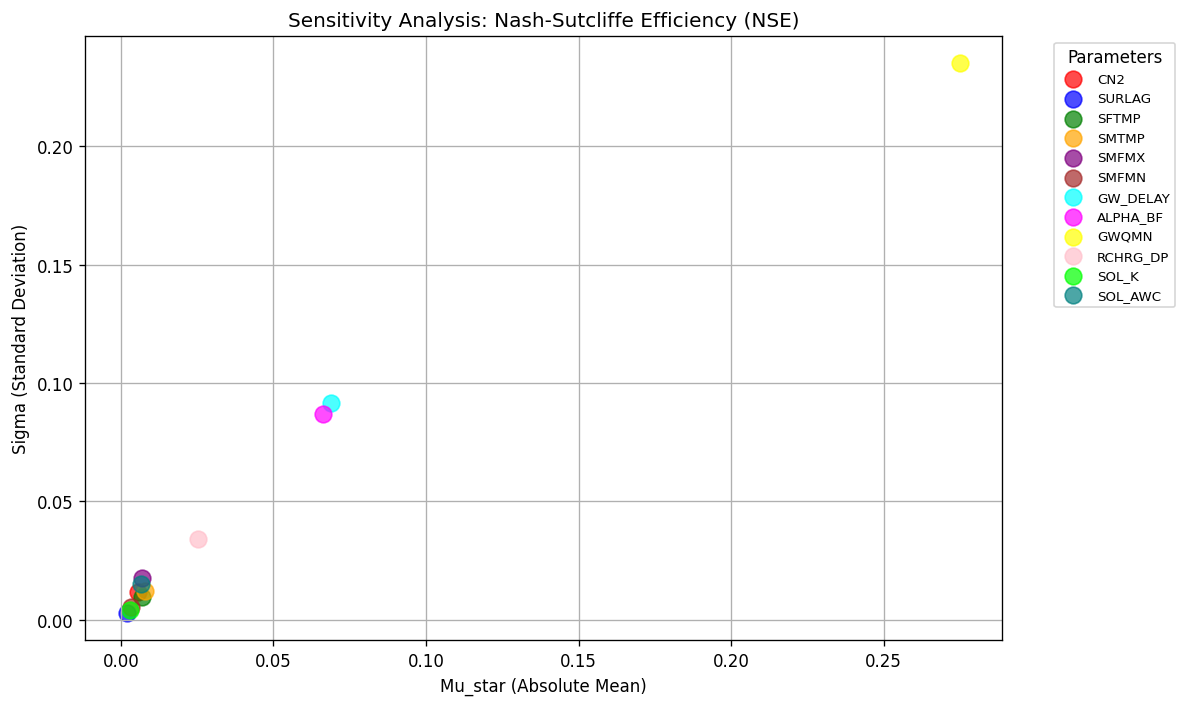


Dataset shape for ML: (208, 14)


,CN2,SURLAG,SFTMP,SMTMP,SMFMX,SMFMN,GW_DELAY,ALPHA_BF,GWQMN,RCHRG_DP,SOL_K,SOL_AWC,range_outflow,NSE
0,80.0,0.05,-0.714286,-5.0,4.857143,1.0,44.285714,0.22,642.857143,0.2,128.577143,0.22,27.5814,-1.151180
1,80.0,0.05,-0.714286,-5.0,4.857143,1.0,44.285714,0.50,642.857143,0.2,128.577143,0.22,27.7418,-1.154081
2,80.0,0.05,-0.714286,-5.0,4.857143,1.0,44.285714,0.50,642.857143,0.2,128.577143,0.50,27.8718,-1.160863
3,80.0,0.05,-0.714286,-5.0,8.285714,1.0,44.285714,0.50,642.857143,0.2,128.577143,0.50,27.9409,-1.162600
4,40.0,0.05,-0.714286,-5.0,8.285714,1.0,44.285714,0.50,642.857143,0.2,128.577143,0.50,27.9409,-1.162600



Random Forest (NSE) performance:
  R2   : 0.9973634815334708
  RMSE : 0.007502013585431143

Feature importance (NSE prediction):
GWQMN: 0.8485
ALPHA_BF: 0.0569
GW_DELAY: 0.0443
RCHRG_DP: 0.0121
SURLAG: 0.0104
SMFMX: 0.0069
SMFMN: 0.0066
SOL_AWC: 0.0055
SMTMP: 0.0032
SFTMP: 0.0024
CN2: 0.0019
SOL_K: 0.0013


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


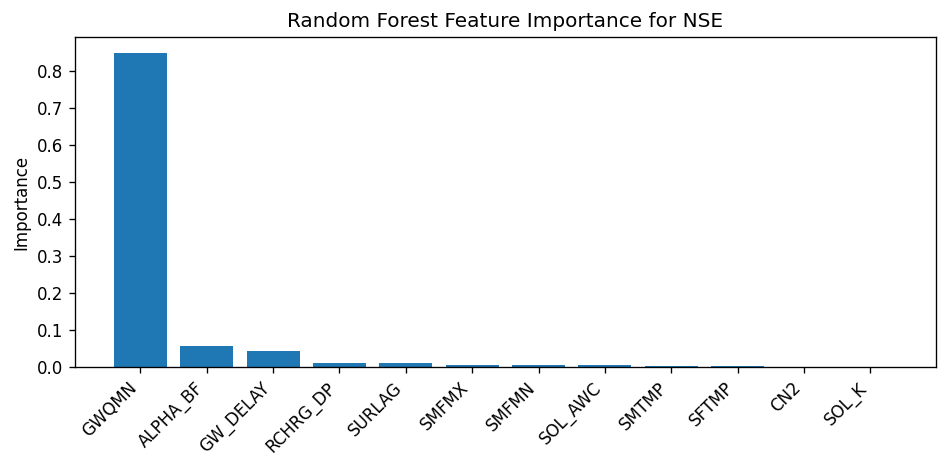


Random Forest (Range) performance:
  R2   : 0.9926055062885911
  RMSE : 0.27857410364585616

Feature importance (Range prediction):
GWQMN: 0.7964
GW_DELAY: 0.0775
ALPHA_BF: 0.0700
SURLAG: 0.0187
RCHRG_DP: 0.0086
SMTMP: 0.0078
SMFMX: 0.0067
SOL_AWC: 0.0046
SOL_K: 0.0034
SMFMN: 0.0027
CN2: 0.0020
SFTMP: 0.0016


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


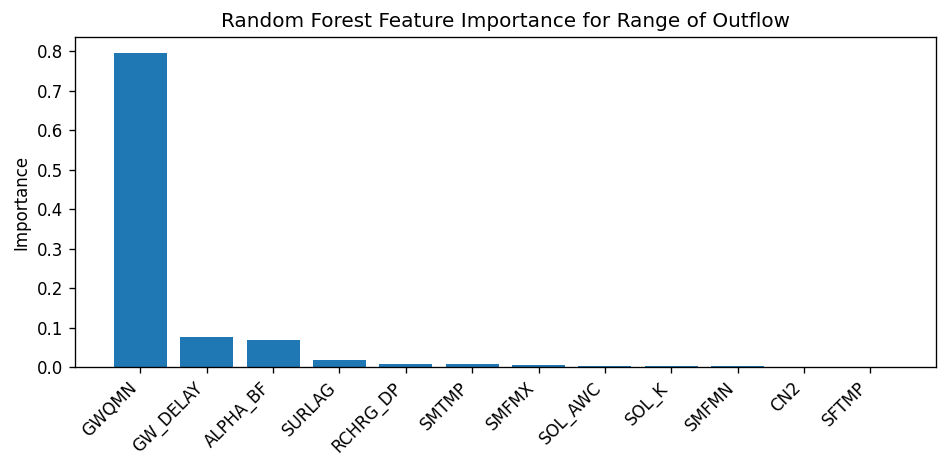


Ensemble-based uncertainty examples (first 10 samples):
Sample 0: true NSE=-1.136, mean pred=-1.132, std=0.002
Sample 1: true NSE=-0.826, mean pred=-0.840, std=0.003
Sample 2: true NSE=-1.170, mean pred=-1.172, std=0.001
Sample 3: true NSE=-1.090, mean pred=-1.088, std=0.001
Sample 4: true NSE=-1.128, mean pred=-1.129, std=0.000
Sample 5: true NSE=-1.117, mean pred=-1.136, std=0.003
Sample 6: true NSE=-1.106, mean pred=-1.108, std=0.001
Sample 7: true NSE=-1.147, mean pred=-1.150, std=0.001
Sample 8: true NSE=-0.817, mean pred=-0.828, std=0.002
Sample 9: true NSE=-0.827, mean pred=-0.825, std=0.002


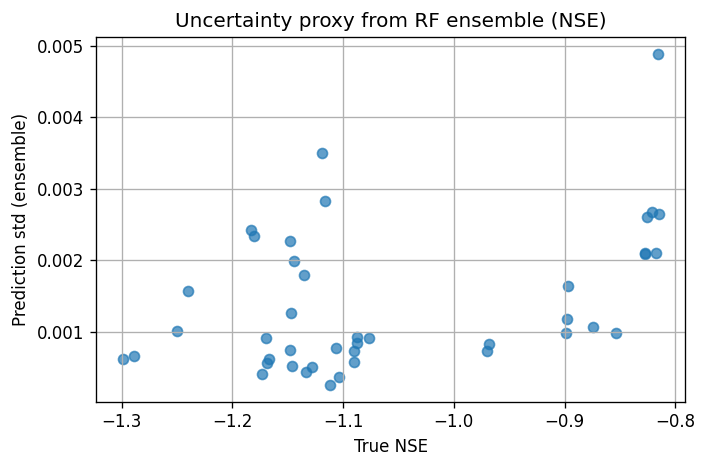

In [3]:
# ======================================================================
# Hydrological Parameter Sensitivity in SWAT using the Morris Method
# + Machine Learning Surrogate with Random Forest
# ======================================================================

# Install required packages (safe to run multiple times)
!pip install SALib openpyxl scikit-learn

# ----------------------------------------------------------------------
# 0. Imports
# ----------------------------------------------------------------------
import os
import random
import subprocess

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from SALib.sample.morris import sample
from SALib.analyze.morris import analyze

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Make plots a bit nicer
plt.rcParams["figure.dpi"] = 120

# ======================================================================
# 1. Problem definition for the Morris method
# ======================================================================
problem = {
    "num_vars": 12,
    "names": [
        "CN2",
        "SURLAG",
        "SFTMP",
        "SMTMP",
        "SMFMX",
        "SMFMN",
        "GW_DELAY",
        "ALPHA_BF",
        "GWQMN",
        "RCHRG_DP",
        "SOL_K",
        "SOL_AWC",
    ],
    "bounds": [
        [30, 100],    # CN2
        [0.05, 24],   # SURLAG
        [-5, 5],      # SFTMP
        [-5, 5],      # SMTMP
        [4, 10],      # SMFMX
        [1, 4],       # SMFMN
        [5, 60],      # GW_DELAY
        [0.01, 0.5],  # ALPHA_BF
        [500, 1500],  # GWQMN
        [0.01, 0.2],  # RCHRG_DP
        [0.01, 300],  # SOL_K
        [0.01, 0.5],  # SOL_AWC
    ],
}

# ======================================================================
# 2. Paths (relative to this notebook / project folder)
# ======================================================================
PROJECT_ROOT = os.getcwd()  # where this notebook is
DATA_DIR = os.path.join(PROJECT_ROOT, "data")
TXTINOUT_DIR = os.path.join(DATA_DIR, "TxtInOut")

observed_file_path = os.path.join(DATA_DIR, "Observed Streamflow.xlsx")
output_file_path = os.path.join(TXTINOUT_DIR, "output.rch")
swat_exe_path = os.path.join(DATA_DIR, "swat2012.exe")

observed_data_column = "Observed Streamflow (m^3/s)"

# rows of output.rch to extract (0-based indices)
rows_to_extract = [
    38, 68, 98, 128, 158, 188, 218, 248, 278, 308, 338, 368,
    428, 458, 488, 518, 548, 578, 608, 638, 668, 698, 728, 758,
]
shift_spaces = 52  # number of characters to skip before reading discharge

# ======================================================================
# 3. Utility functions
# ======================================================================
def clamp(value, min_val, max_val):
    """Clamp a value between min_val and max_val."""
    return max(min(value, max_val), min_val)


def nse(observed, simulated):
    """Nash–Sutcliffe Efficiency."""
    observed = np.asarray(observed, dtype=float)
    simulated = np.asarray(simulated, dtype=float)
    if len(observed) != len(simulated) or len(observed) == 0:
        return np.nan
    numerator = np.sum((observed - simulated) ** 2)
    denominator = np.sum((observed - np.mean(observed)) ** 2)
    if denominator == 0:
        return np.nan
    return 1.0 - numerator / denominator


def range_of_outflow(simulated_outputs):
    """Range (max - min) of simulated discharge."""
    if simulated_outputs is None or len(simulated_outputs) == 0:
        return 0.0
    arr = np.asarray(simulated_outputs, dtype=float)
    return float(np.max(arr) - np.min(arr))


# ======================================================================
# 4. Function to update SWAT inputs and run the model
# ======================================================================
def update_and_run_swat(params):
    """
    Update SWAT input files based on the parameter set, run SWAT,
    and extract monthly simulated discharge from output.rch.

    Parameters
    ----------
    params : np.ndarray
        Array of 12 parameters in the same order as 'problem["names"]'.

    Returns
    -------
    list[float]
        List of simulated discharge values extracted from output.rch.
    """
    try:
        # --------------------------------------------------------------
        # 4.1 Update CN2 in a .mgt file
        # --------------------------------------------------------------
        mgt_files = [f for f in os.listdir(TXTINOUT_DIR) if f.endswith(".mgt")]
        if not mgt_files:
            raise FileNotFoundError("No .mgt files found in TxtInOut directory.")

        selected_mgt_file = os.path.join(TXTINOUT_DIR, random.choice(mgt_files))

        with open(selected_mgt_file, "r") as file:
            mgt_lines = file.readlines()

        # CN2 assumed at line index 10 (0-based) – adjust if needed
        cn2_index = 10
        mgt_lines[cn2_index] = f"{params[0]:.2f} | CN2: SCS Curve Number\n"

        with open(selected_mgt_file, "w") as file:
            file.writelines(mgt_lines)

        # --------------------------------------------------------------
        # 4.2 Update basins.bsn
        # --------------------------------------------------------------
        bsn_file_path = os.path.join(TXTINOUT_DIR, "basins.bsn")
        with open(bsn_file_path, "r") as file:
            bsn_lines = file.readlines()

        bsn_lines[19] = f"{params[1]:.2f} | SURLAG : Surface runoff lag time [days]\n"
        bsn_lines[3]  = f"{params[2]:.2f} | SFTMP : Snowfall temperature [°C]\n"
        bsn_lines[4]  = f"{params[3]:.2f} | SMTMP : Snow melt base temperature [°C]\n"
        bsn_lines[5]  = f"{params[4]:.2f} | SMFMX : Max snowmelt factor [mm H2O/°C-day]\n"
        bsn_lines[6]  = f"{params[5]:.2f} | SMFMN : Min snowmelt factor [mm H2O/°C-day]\n"

        with open(bsn_file_path, "w") as file:
            file.writelines(bsn_lines)

        # --------------------------------------------------------------
        # 4.3 Update groundwater (.gw) files
        # --------------------------------------------------------------
        gw_files = [
            os.path.join(TXTINOUT_DIR, f)
            for f in os.listdir(TXTINOUT_DIR)
            if f.endswith(".gw")
        ]
        for gw_file_path in gw_files:
            with open(gw_file_path, "r") as file:
                gw_lines = file.readlines()

            gw_lines[3] = f"{params[6]:.2f} | GW_DELAY : Groundwater delay [days]\n"
            gw_lines[4] = f"{params[7]:.2f} | ALPHA_BF : Baseflow alpha factor [days]\n"
            gw_lines[5] = f"{params[8]:.2f} | GWQMN : Threshold depth [mm]\n"
            gw_lines[8] = f"{params[9]:.2f} | RCHRG_DP : Deep aquifer percolation fraction\n"

            with open(gw_file_path, "w") as file:
                file.writelines(gw_lines)

        # --------------------------------------------------------------
        # 4.4 Update SOL_K and SOL_AWC in .sol files
        # --------------------------------------------------------------
        sol_k_range = (0.01, 300.0)
        sol_awc_range = (0.01, 0.5)

        def process_sol_values(target_text, value_range, factor_param):
            """Multiply existing layer values in .sol files by parameter."""
            for file_name in os.listdir(TXTINOUT_DIR):
                if file_name.endswith(".sol"):
                    file_path = os.path.join(TXTINOUT_DIR, file_name)
                    with open(file_path, "r") as file:
                        lines = file.readlines()

                    updated_lines = []
                    for line in lines:
                        if target_text in line:
                            parts = line.split(target_text)
                            header = parts[0]
                            values = parts[1].strip().split()

                            updated_values = [
                                f"{clamp(float(v) * factor_param, *value_range):.2f}"
                                for v in values
                            ]
                            updated_line = (
                                header
                                + target_text
                                + " "
                                + " ".join(updated_values)
                                + "\n"
                            )
                            updated_lines.append(updated_line)
                        else:
                            updated_lines.append(line)

                    with open(file_path, "w") as file:
                        file.writelines(updated_lines)

        process_sol_values("Ksat. (est.) [mm/hr]:", sol_k_range, params[10])
        process_sol_values("Ave. AW Incl. Rock Frag :", sol_awc_range, params[11])

        # --------------------------------------------------------------
        # 4.5 Run SWAT executable
        # --------------------------------------------------------------
        result = subprocess.run(
            [swat_exe_path],
            cwd=TXTINOUT_DIR,
            check=True,
            capture_output=True,
            text=True,
        )
        print(result.stdout)

        # --------------------------------------------------------------
        # 4.6 Extract simulated discharge from output.rch
        # --------------------------------------------------------------
        with open(output_file_path, "r") as file:
            file_content = file.readlines()

        extracted_values = []
        for row_index in rows_to_extract:
            if row_index < len(file_content):
                line = file_content[row_index].rstrip("\n")
                shifted_line = line[shift_spaces:].strip()
                values = shifted_line.split()
                try:
                    extracted_values.append(float(values[0]))
                except (IndexError, ValueError):
                    raise ValueError(
                        f"Error processing row {row_index + 1} in output.rch"
                    )

        # Optional: print parameter set and flows
        print(
            "Updated Parameters:",
            ", ".join(
                f"{name}={val:.2f}"
                for name, val in zip(problem["names"], params)
            ),
        )
        print(f"Extracted Streamflow Values: {extracted_values}")

        return extracted_values

    except subprocess.CalledProcessError as e:
        print(f"SWAT model execution failed with error code {e.returncode}: {e.stderr}")
        raise
    except Exception as ex:
        print(f"An error occurred: {str(ex)}")
        raise


# ======================================================================
# 5. Main sensitivity analysis workflow (Morris)
# ======================================================================
# 5.1 Load observed data
observed_data = pd.read_excel(observed_file_path)[observed_data_column].to_numpy()

# 5.2 Generate Morris samples
param_values = sample(
    problem,
    N=3000,
    num_levels=8,
    optimal_trajectories=16,
)

# 5.3 Run SWAT for each parameter set
range_results = []
nse_results = []

for i, params in enumerate(param_values):
    print(f"\nRunning SWAT for sample {i+1}/{len(param_values)}")
    simulated_outputs = update_and_run_swat(params)
    range_results.append(range_of_outflow(simulated_outputs))
    nse_results.append(nse(observed_data, simulated_outputs))

range_results = np.array(range_results)
nse_results = np.array(nse_results)

# 5.4 Perform Morris analysis
morris_range = analyze(
    problem,
    param_values,
    range_results,
    num_levels=8,
    conf_level=0.95,
    print_to_console=False,
)

morris_nse = analyze(
    problem,
    param_values,
    nse_results,
    num_levels=8,
    conf_level=0.95,
    print_to_console=False,
)

# 5.5 Print Morris results
print("\nDetailed Morris Analysis for Range of Outflow:")
for i, name in enumerate(problem["names"]):
    print(
        f"{name}: Mu_star={morris_range['mu_star'][i]:.4f}, "
        f"Sigma={morris_range['sigma'][i]:.4f}"
    )

print("\nDetailed Morris Analysis for NSE:")
for i, name in enumerate(problem["names"]):
    print(
        f"{name}: Mu_star={morris_nse['mu_star'][i]:.4f}, "
        f"Sigma={morris_nse['sigma'][i]:.4f}"
    )

# 5.6 Plot Morris results
colors = [
    "red", "blue", "green", "orange", "purple", "brown",
    "cyan", "magenta", "yellow", "pink", "lime", "teal"
]

plt.figure(figsize=(10, 6))
for i, txt in enumerate(problem["names"]):
    plt.scatter(
        morris_range["mu_star"][i],
        morris_range["sigma"][i],
        s=100,
        alpha=0.7,
        label=txt,
        color=colors[i % len(colors)],
    )
plt.title("Sensitivity Analysis: Range of Outflow (Max - Min)")
plt.xlabel("Mu_star (Absolute Mean)")
plt.ylabel("Sigma (Standard Deviation)")
plt.legend(title="Parameters", fontsize=8, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for i, txt in enumerate(problem["names"]):
    plt.scatter(
        morris_nse["mu_star"][i],
        morris_nse["sigma"][i],
        s=100,
        alpha=0.7,
        label=txt,
        color=colors[i % len(colors)],
    )
plt.title("Sensitivity Analysis: Nash-Sutcliffe Efficiency (NSE)")
plt.xlabel("Mu_star (Absolute Mean)")
plt.ylabel("Sigma (Standard Deviation)")
plt.legend(title="Parameters", fontsize=8, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

# ======================================================================
# 6. Machine Learning Surrogate for SWAT using Random Forest
#    - Predict NSE and Range of Outflow from SWAT parameters
#    - Derive ML-based feature importance
#    - Simple ensemble-based uncertainty estimate
# ======================================================================

# 6.1 Build ML dataset from Morris samples
features = problem["names"]

df_ml = pd.DataFrame(param_values, columns=features)
df_ml["range_outflow"] = range_results
df_ml["NSE"] = nse_results

# Drop NaNs or infs if any
df_ml = df_ml.replace([np.inf, -np.inf], np.nan).dropna()

print("\nDataset shape for ML:", df_ml.shape)
display(df_ml.head())

# -----------------------------
# 6.2 Random Forest for NSE
# -----------------------------
X = df_ml[features].values
y_nse = df_ml["NSE"].values

X_train, X_test, y_train_nse, y_test_nse = train_test_split(
    X, y_nse, test_size=0.2, random_state=42
)

rf_nse = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf_nse.fit(X_train, y_train_nse)

y_pred_nse = rf_nse.predict(X_test)

print("\nRandom Forest (NSE) performance:")
print("  R2   :", r2_score(y_test_nse, y_pred_nse))
print("  RMSE :", mean_squared_error(y_test_nse, y_pred_nse, squared=False))

# -----------------------------
# 6.3 Feature importance for NSE
# -----------------------------
importances_nse = rf_nse.feature_importances_
fi_nse = sorted(zip(features, importances_nse), key=lambda x: -x[1])

print("\nFeature importance (NSE prediction):")
for name, imp in fi_nse:
    print(f"{name}: {imp:.4f}")

plt.figure(figsize=(8, 4))
plt.bar([f[0] for f in fi_nse], [f[1] for f in fi_nse])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance for NSE")
plt.tight_layout()
plt.show()

# -----------------------------
# 6.4 Random Forest for Range of Outflow
# -----------------------------
y_range = df_ml["range_outflow"].values

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_range, test_size=0.2, random_state=42
)

rf_range = RandomForestRegressor(
    n_estimators=300,
    random_state=0,
    n_jobs=-1
)
rf_range.fit(X_train_r, y_train_r)

y_pred_range = rf_range.predict(X_test_r)

print("\nRandom Forest (Range) performance:")
print("  R2   :", r2_score(y_test_r, y_pred_range))
print("  RMSE :", mean_squared_error(y_test_r, y_pred_range, squared=False))

importances_range = rf_range.feature_importances_
fi_range = sorted(zip(features, importances_range), key=lambda x: -x[1])

print("\nFeature importance (Range prediction):")
for name, imp in fi_range:
    print(f"{name}: {imp:.4f}")

plt.figure(figsize=(8, 4))
plt.bar([f[0] for f in fi_range], [f[1] for f in fi_range])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance for Range of Outflow")
plt.tight_layout()
plt.show()

# -----------------------------
# 6.5 Simple ensemble-based uncertainty for NSE
# -----------------------------
ensemble_seeds = [0, 1, 2, 3, 4]
ensemble_models = []

for seed in ensemble_seeds:
    m = RandomForestRegressor(
        n_estimators=200,
        random_state=seed,
        n_jobs=-1
    )
    m.fit(X_train, y_train_nse)
    ensemble_models.append(m)

# Predict with all ensemble members
all_preds = np.vstack([m.predict(X_test) for m in ensemble_models])  # (n_models, n_samples)

mean_pred = all_preds.mean(axis=0)
std_pred = all_preds.std(axis=0)

print("\nEnsemble-based uncertainty examples (first 10 samples):")
for i in range(min(10, len(mean_pred))):
    print(
        f"Sample {i}: true NSE={y_test_nse[i]:.3f}, "
        f"mean pred={mean_pred[i]:.3f}, std={std_pred[i]:.3f}"
    )

plt.figure(figsize=(6, 4))
plt.scatter(y_test_nse, std_pred, alpha=0.7)
plt.xlabel("True NSE")
plt.ylabel("Prediction std (ensemble)")
plt.title("Uncertainty proxy from RF ensemble (NSE)")
plt.grid(True)
plt.tight_layout()
plt.show()
